In [2]:
import pandas as pd

df = pd.read_csv('/content/Student Mental health.csv')

In [3]:
df.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [4]:
# Encode stress related columns
columns_to_encode = ['Do you have Depression?', 'Do you have Anxiety?', 'Do you have Panic attack?', 'Did you seek any specialist for a treatment?']

# Encoding 'Yes' and 'No' to 1 and 0
df[columns_to_encode] = df[columns_to_encode].applymap(lambda x: 1 if x == 'Yes' else 0)

df.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,1,0,1,0
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,0,1,0,0
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,1,1,1,0
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,1,0,0,0
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,0,0,0,0


In [5]:
# Creating a new column that sums the encoded values that represents their stress level, higher the value, higher stress
df['Stress Level'] = df[columns_to_encode].sum(axis=1)

df.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?,Stress Level
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,1,0,1,0,2
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,0,1,0,0,1
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,1,1,1,0,3
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,1,0,0,0,1
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,0,0,0,0,0


In [6]:
df = df.dropna(subset = ['Age'])

In [7]:
from sklearn.preprocessing import MinMaxScaler

# Normalizing Stress Level values
scaler = MinMaxScaler()
df['Stress Level'] = scaler.fit_transform(df[['Stress Level']])

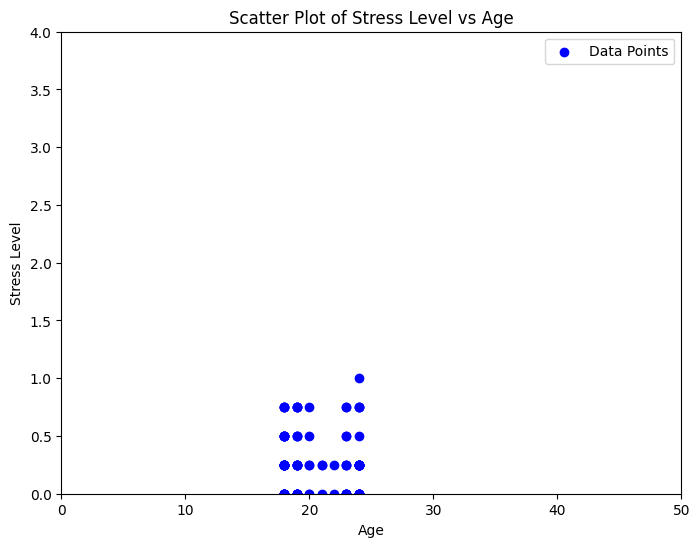

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Extracting the Age and Stress Level columns for plotting
X = df['Age'].values.reshape((-1, 1))
y = df['Stress Level'].values

plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Data Points')
plt.xlim(0, 50)
plt.ylim(0, 4)
plt.xlabel('Age')
plt.ylabel('Stress Level')
plt.title('Scatter Plot of Stress Level vs Age')
plt.legend()
plt.show()

In [9]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

<ipython-input-10-4d4b1d48ffd9>:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title("$y$ = (%0.3f) + (%0.3f) $x$\n$R^2$ = %0.3f" % (model.intercept_, model.coef_, r_sq))


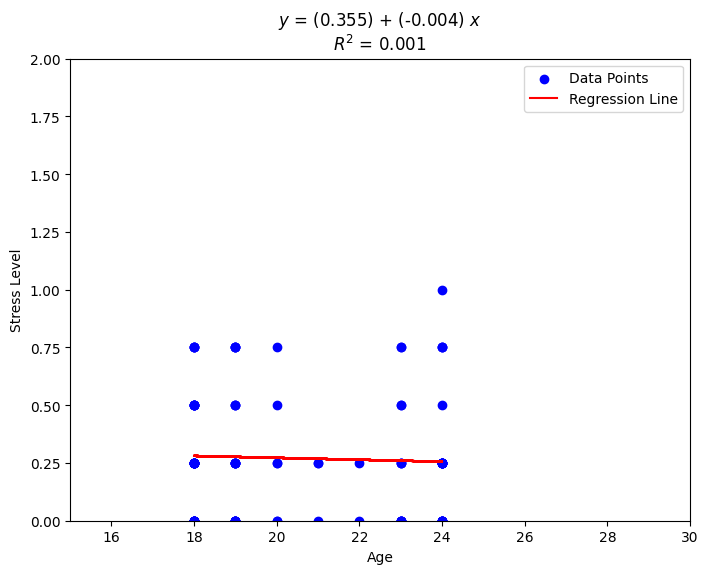

In [10]:
r_sq = model.score(X, y)
y_pred = model.predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X, y_pred, color='red', label='Regression Line')
plt.xlim(15, 30)
plt.ylim(0, 2)
plt.xlabel('Age')
plt.ylabel('Stress Level')
plt.title("$y$ = (%0.3f) + (%0.3f) $x$\n$R^2$ = %0.3f" % (model.intercept_, model.coef_, r_sq))
plt.legend()
plt.show()

From this dataset, using linear regression it predicts that younger university students tend to experience more stress.

In [13]:
import statsmodels.api as sm

model = sm.OLS(y, X)

results = model.fit()

In [14]:
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.495
Model:                            OLS   Adj. R-squared (uncentered):              0.490
Method:                 Least Squares   F-statistic:                              97.12
Date:                Sat, 06 Jul 2024   Prob (F-statistic):                    2.27e-16
Time:                        13:40:09   Log-Likelihood:                         -10.729
No. Observations:                 100   AIC:                                      23.46
Df Residuals:                      99   BIC:                                      26.06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------